In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [35]:
df = pd.read_csv("house_price_data.csv")

In [36]:
df.head()

,id,area_sqft,bedrooms,bathrooms,location,age_of_house,has_garage,house_price
0,1,1200.0,3,2.0,Dhaka,10.0,1,85000
1,2,900.0,2,1.0,Chittagong,15.0,0,60000
2,3,NaN,3,2.0,Sylhet,8.0,1,92000
3,4,1500.0,4,3.0,Rajshahi,5.0,1,130000
4,5,800.0,2,1.0,dhaka,20.0,0,45000


In [37]:
df.shape

(800, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            800 non-null    int64  
 1   area_sqft     792 non-null    float64
 2   bedrooms      800 non-null    int64  
 3   bathrooms     796 non-null    float64
 4   location      800 non-null    object 
 5   age_of_house  799 non-null    float64
 6   has_garage    800 non-null    int64  
 7   house_price   800 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 50.1+ KB


In [39]:
df.describe()

,id,area_sqft,bedrooms,bathrooms,age_of_house,has_garage,house_price
count,800.000000,792.000000,800.000000,796.000000,799.000000,800.000000,800.000000
mean,409.875000,1825.429293,3.592500,2.706030,15.008761,0.536250,138415.750000
std,244.709446,920.384857,1.578626,1.461115,9.295682,0.498996,102436.092483
min,1.000000,400.000000,1.000000,1.000000,1.000000,0.000000,28000.000000
25%,200.750000,1010.000000,2.000000,1.000000,7.000000,0.000000,52000.000000
50%,400.500000,1500.000000,3.000000,2.000000,13.000000,1.000000,92650.000000
75%,600.250000,2600.000000,5.000000,4.000000,21.000000,1.000000,210000.000000
max,850.000000,5000.000000,8.000000,7.000000,35.000000,1.000000,720000.000000


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.isna().sum()

id              0
area_sqft       8
bedrooms        0
bathrooms       4
location        0
age_of_house    1
has_garage      0
house_price     0
dtype: int64

In [42]:
df.columns

Index(['id', 'area_sqft', 'bedrooms', 'bathrooms', 'location', 'age_of_house',
       'has_garage', 'house_price'],
      dtype='object')

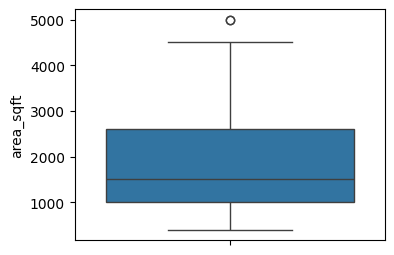

In [43]:
#visualisaton
plt.figure(figsize=(4,3))
sns.boxplot(df['area_sqft'])
plt.show()

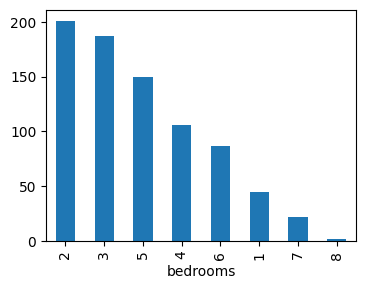

In [44]:
plt.figure(figsize=(4,3))
df['bedrooms'].value_counts().plot(kind='bar')
plt.show()

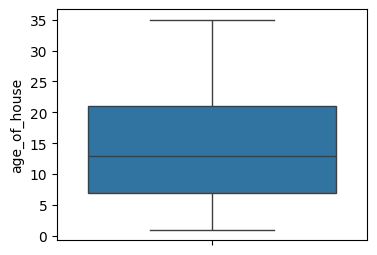

In [45]:
plt.figure(figsize=(4,3))
sns.boxplot(df['age_of_house'])
plt.show()

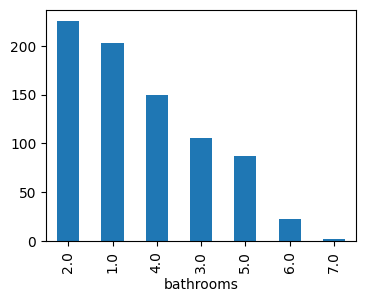

In [46]:
plt.figure(figsize=(4,3))
df['bathrooms'].value_counts().plot(kind='bar')
plt.show()

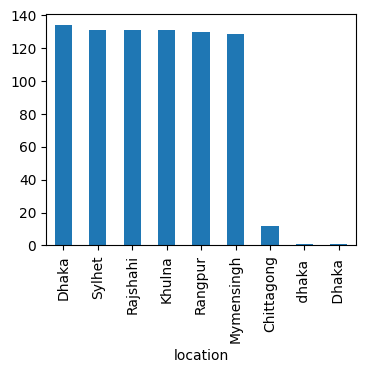

In [47]:
plt.figure(figsize=(4,3))
df['location'].value_counts().plot(kind='bar')
plt.show()

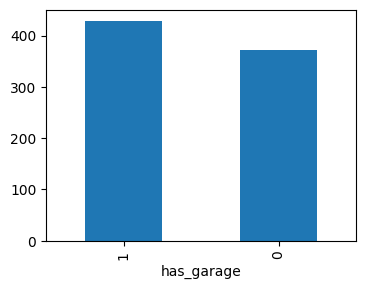

In [48]:
plt.figure(figsize=(4,3))
df['has_garage'].value_counts().plot(kind='bar')
plt.show()

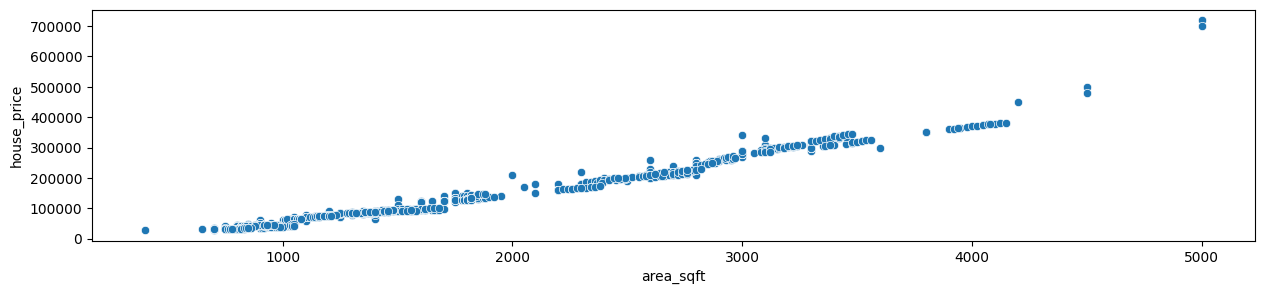

In [49]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='area_sqft', y='house_price', data=df)
plt.show()

In [50]:
df.isna().sum()

id              0
area_sqft       8
bedrooms        0
bathrooms       4
location        0
age_of_house    1
has_garage      0
house_price     0
dtype: int64

In [51]:
df['area_sqft'] = df['area_sqft'].fillna(df['area_sqft'].mean())

In [52]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [53]:
df['age_of_house'] = df['age_of_house'].ffill()

In [54]:
df.isna().sum()

id              0
area_sqft       0
bedrooms        0
bathrooms       0
location        0
age_of_house    0
has_garage      0
house_price     0
dtype: int64

In [55]:
le = LabelEncoder()

In [56]:
df['location'] = le.fit_transform(df['location'])

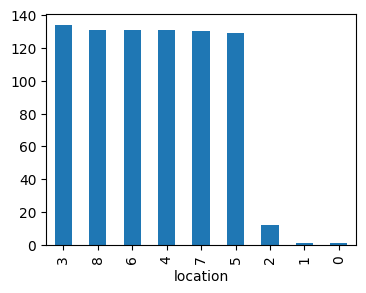

In [57]:
plt.figure(figsize=(4,3))
df['location'].value_counts().plot(kind='bar')
plt.show()

In [58]:
df.head()

,id,area_sqft,bedrooms,bathrooms,location,age_of_house,has_garage,house_price
0,1,1200.000000,3,2.0,3,10.0,1,85000
1,2,900.000000,2,1.0,2,15.0,0,60000
2,3,1825.429293,3,2.0,8,8.0,1,92000
3,4,1500.000000,4,3.0,6,5.0,1,130000
4,5,800.000000,2,1.0,1,20.0,0,45000


In [59]:
#Feature/ target split
x = df[['id', 'area_sqft', 'bedrooms', 'bathrooms', 'location', 'age_of_house', 'has_garage']]
y = df[['house_price']]

In [60]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
xtrain.head()

,id,area_sqft,bedrooms,bathrooms,location,age_of_house,has_garage
264,265,800.0,2,1.0,6,26.0,0
615,616,2420.0,5,4.0,4,8.0,1
329,330,1400.0,3,2.0,3,16.0,1
342,343,820.0,2,1.0,6,26.0,0
394,395,1300.0,3,2.0,8,15.0,1


In [62]:
ytrain.head()

,house_price
264,41000
615,196000
329,91500
342,41000
394,84500


# Applying KNN Regression 

In [63]:
#KNN regression model implementation
knnr = KNeighborsRegressor()

In [64]:
knnr_model = knnr.fit(xtrain, ytrain)

In [65]:
knnr_model.score(xtrain, ytrain)

0.9876093506230187

In [66]:
knnr_model.score(xtest, ytest)

0.9882520209400185

In [67]:
k_pred_y = knnr_model.predict(xtest)

In [68]:
#mae
mae_k = mean_absolute_error(ytest, k_pred_y)
mae_k

6124.75

In [69]:
#mse
mse_k = mean_squared_error(ytest, k_pred_y)
mse_k

104389425.0

In [70]:
#r2
r2_k = r2_score(ytest, k_pred_y)
r2_k

0.9882520209400185

# Applying linear regression

In [73]:
lr = LinearRegression()

In [74]:
lin_model = lr.fit(xtrain, ytrain)

In [75]:
lin_model.score(xtrain, ytrain)

0.9684344905035878

In [76]:
lin_model.score(xtest, ytest)

0.9777698467201532

In [77]:
l_pre_y = lin_model.predict(xtest)

In [78]:
#mae
mae_l = mean_absolute_error(ytest, l_pre_y)
mae_l

10399.464511012058

In [79]:
#mse_l
mse_l = mean_squared_error(ytest, l_pre_y)
mse_l

197531244.0290235

In [80]:
#r2_l
r2_l = r2_score(ytest, l_pre_y)
r2_l

0.9777698467201532

# Both model performance are Almost same 